# Analysis of Yelp Business Intelligence Data

We will analyze a subset of Yelp's business, reviews and user data. This dataset comes to us from [Kaggle](https://www.kaggle.com/yelp-dataset/yelp-dataset) although we have taken steps to pull this data into a publis s3 bucket: `s3://sta9760f2021spark-weiye/yelp/*.json`

# Installation and Initial Setup

Begin by installing the necessary libraries that may need to conduct analysis. I installed `pandas` `matplotlib` and `seaborn`

In [1]:
%%info

In [2]:
sc.list_packages()

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
16,application_1638441145344_0017,pyspark,idle,,,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version  
-------------------------- ---------
beautifulsoup4             4.9.1    
boto                       2.49.0   
click                      7.1.2    
jmespath                   0.10.0   
joblib                     0.16.0   
lxml                       4.5.2    
mysqlclient                1.4.2    
nltk                       3.5      
nose                       1.3.4    
numpy                      1.16.5   
pip                        9.0.1    
py-dateutil                2.2      
python37-sagemaker-pyspark 1.4.0    
pytz                       2020.1   
PyYAML                     5.3.1    
regex                      2020.7.14
setuptools                 28.8.0   
six                        1.13.0   
soupsieve                  1.9.5    
tqdm                       4.48.2   
wheel                      0.29.0   
windmill                   1.6

In [3]:
sc.install_pypi_package("pandas==1.0.3")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/4a/6a/94b219b8ea0f2d580169e85ed1edc0163743f55aaeca8a44c2e8fc1e344e/pandas-1.0.3-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/36/7a/87837f39d0296e723bb9b62bbb257d0355c7f6128853c78955f57342a56d/python_dateutil-2.8.2-py2.py3-none-any.whl

In [4]:
sc.install_pypi_package("matplotlib==3.2.1")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/b2/c2/71fcf957710f3ba1f09088b35776a799ba7dd95f7c2b195ec800933b276b/matplotlib-3.2.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/a0/34/895006117f6fce0b4de045c87e154ee4a20c68ec0a4c9a36d900888fb6bc/pyparsing-3.0.6-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5c/f9/695d6bedebd747e5eb0fe8fad57b72fdf25411273a39791cde838d5a8f51/cycler-0.11.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/09/6b/6e567cb2e86d4e5939a9233f8734e26021b6a9c1bc4b1edccba236a84cc2/kiwisolver-1.3.2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl

In [5]:
sc.install_pypi_package("numpy")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [6]:
sc.install_pypi_package("scipy==1.7.0")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/b2/85/b00f13b52d079b5625e1a12330fc6453c947a482ff667a907c7bc60ed220/scipy-1.7.0-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl

In [7]:
sc.install_pypi_package("seaborn==0.11.2")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/10/5b/0479d7d845b5ba410ca702ffcd7f2cd95a14a4dfff1fde2637802b258b9b/seaborn-0.11.2-py3-none-any.whl

In [8]:
sc.install_pypi_package("kiwisolver==1.2.0")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/31/b9/6202dcae729998a0ade30e80ac00f616542ef445b088ec970d407dfd41c0/kiwisolver-1.2.0-cp37-cp37m-manylinux1_x86_64.whl
  Found existing installation: kiwisolver 1.3.2
    Uninstalling kiwisolver-1.3.2:
      Successfully uninstalled kiwisolver-1.3.2

In [9]:
sc.install_pypi_package("pyparsing==2.4.7")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/8a/bb/488841f56197b13700afd5658fc279a2025a39e22449b7cf29864669b15d/pyparsing-2.4.7-py2.py3-none-any.whl
  Found existing installation: pyparsing 3.0.6
    Uninstalling pyparsing-3.0.6:
      Successfully uninstalled pyparsing-3.0.6

## Importing

Now, import the installed packages from the previous block below.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import seaborn as sns
sns.set()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Loading Data

We are finally ready to load data. Using `spark` load the data from S3 into a `dataframe` object that we can manipulate further down in our analysis.

In [9]:
business =spark.read.json('s3://sta9760f2021spark-weiye/yelp/yelp_academic_dataset_business.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Overview of Data

Display the number of rows and columns in our dataset.

In [10]:
# Total columns
print(f'Total Columns: {len(business.dtypes)}')
print(f'Total Rows: {business.count():,}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 14
Total Rows: 160,585

Display the DataFrame schema below.

In [11]:
business.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

Display the first 5 rows with the following columns:

* `business_id`
* `name`
* `city`
* `state`
* `categories`

In [12]:
business1 = business.select("business_id", "name", "city", "state", "categories")
business1.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-----------+-----+--------------------+
|         business_id|                name|       city|state|          categories|
+--------------------+--------------------+-----------+-----+--------------------+
|6iYb2HFDywm3zjuRg...| Oskar Blues Taproom|    Boulder|   CO|Gastropubs, Food,...|
|tCbdrRPZA0oiIYSmH...|Flying Elephants ...|   Portland|   OR|Salad, Soup, Sand...|
|bvN78flM8NLprQ1a1...|      The Reclaimory|   Portland|   OR|Antiques, Fashion...|
|oaepsyvc0J17qwi8c...|         Great Clips|Orange City|   FL|Beauty & Spas, Ha...|
|PE9uqAjdw0E4-8mjG...|   Crossfit Terminus|    Atlanta|   GA|Gyms, Active Life...|
+--------------------+--------------------+-----------+-----+--------------------+
only showing top 5 rows

# Analyzing Categories

Let's now answer this question: **how many unique categories are represented in this dataset?**

Essentially, we have the categories per business as a list - this is useful to quickly see what each business might be represented as but it is difficult to easily answer questions such as:

* How many businesses are categorized as `Active Life`, for instance
* What are the top 20 most popular categories available?

## Association Table

We need to "break out" these categories from the business ids? One common approach to take is to build an association table mapping a single business id multiple times to each distinct category.

For instance, given the following:


| business_id | categories |
|-------------|------------|
| abcd123     | a,b,c      |

We would like to derive something like:

| business_id | category |
|-------------|------------|
| abcd123     | a          |
| abcd123     | b          |
| abcd123     | c          |


What this does is allow us to then perform a myriad of rollups and other analysis on this association table which can aid us in answering the questions asked above.

Implement the code necessary to derive the table described from your original yelp dataframe.

In [13]:
business2 = business1.drop("name", "city", "state")
business2.show(1)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+
|         business_id|          categories|
+--------------------+--------------------+
|6iYb2HFDywm3zjuRg...|Gastropubs, Food,...|
+--------------------+--------------------+
only showing top 1 row

In [14]:
from pyspark.sql.functions import explode, split
business2_exploded = business2.withColumn('categories',explode(split('categories',",")))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Display the first 5 rows of your association table below.

In [15]:
from pyspark.sql.functions import col
business2_exploded.filter(business2_exploded.categories =="Active Life").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----------+
|         business_id| categories|
+--------------------+-----------+
|FkS4OmTBeNHPK3sV4...|Active Life|
|hww2qQs51UoMK9B1u...|Active Life|
|MAfomMiBWp7n-cwbk...|Active Life|
|hw7B3GVDKad9vlx5b...|Active Life|
|92U5Fpu4dFh4wZvAJ...|Active Life|
+--------------------+-----------+
only showing top 5 rows

## Total Unique Categories

Finally, we are ready to answer the question: **what is the total number of unique categories available?**

Below, implement the code necessary to calculate this figure.

In [16]:
business2_exploded.select('categories').distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

2487

## Top Categories By Business

Now let's find the top categories in this dataset by rolling up categories.

### Counts of Businesses / Category

So now, let's unroll our distinct count a bit and display the per count value of businesses per category.

The expected output should be:

| category | count |
|-------------|------------|
| a     | 15         |
| b     | 2          |
| c     | 45          |

Or something to that effect.

In [17]:
business2_exploded.select('categories').distinct()
business2_exploded = business2_exploded.filter(business2_exploded.categories != "\\N")
business2_exploded.count()
business2_exploded.groupby('categories').count().show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|          categories|count|
+--------------------+-----+
|      Dermatologists|   68|
|      Paddleboarding|   12|
|               Tires| 1456|
|    Historical Tours|   60|
|         Hobby Shops|  135|
|    Military Surplus|   11|
| Food Safety Trai...|    2|
|          Bubble Tea|  184|
|             Embassy|    3|
|            Handyman|   87|
|            Macarons|   50|
|             Propane|   83|
|             Tanning|  147|
|  Convenience Stores| 1340|
|            Japanese| 2039|
|         Car Dealers| 1013|
|             Lawyers|  422|
|             Rolfing|   28|
|        IV Hydration|   47|
|      Aerial Fitness|    2|
+--------------------+-----+
only showing top 20 rows

### Bar Chart of Top Categories

With this data available, let us now build a barchart of the top 20 categories. 

**HINT**: don't forget about the matplotlib magic!

```
%matplot plt
```

In [18]:
barchart_df = business2_exploded.groupby('categories').count().orderBy('count',ascending=False)
barchart_df.show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|          categories|count|
+--------------------+-----+
|         Restaurants|36340|
|                Food|22094|
|            Shopping|20056|
|         Restaurants|14423|
|       Home Services|12001|
|       Beauty & Spas|11633|
|    Health & Medical|11390|
|           Nightlife| 9808|
|      Local Services| 9299|
|                Bars| 8914|
| Event Planning &...| 7617|
|                Food| 7375|
|         Active Life| 7039|
|          Automotive| 6785|
|            Shopping| 6149|
|        Coffee & Tea| 5735|
|          Sandwiches| 5697|
| American (Tradit...| 5235|
|             Fashion| 5231|
|       Beauty & Spas| 4941|
+--------------------+-----+
only showing top 20 rows

In [19]:
df_bar = barchart_df.toPandas()
data = pd.DataFrame(df_bar, columns=['count', 'categories'])
data_sorted = data.sort_values(by='count', ascending=False)
pd.options.display.float_format = '{:,.0f}'.format
data_sorted.set_index('categories', inplace=True)
pic1 = data_sorted.head(20)
pic1

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                            count
categories                       
 Restaurants                36340
 Food                       22094
 Shopping                   20056
Restaurants                 14423
 Home Services              12001
 Beauty & Spas              11633
 Health & Medical           11390
 Nightlife                   9808
 Local Services              9299
 Bars                        8914
 Event Planning & Services   7617
Food                         7375
 Active Life                 7039
 Automotive                  6785
Shopping                     6149
 Coffee & Tea                5735
 Sandwiches                  5697
 American (Traditional)      5235
 Fashion                     5231
Beauty & Spas                4941

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

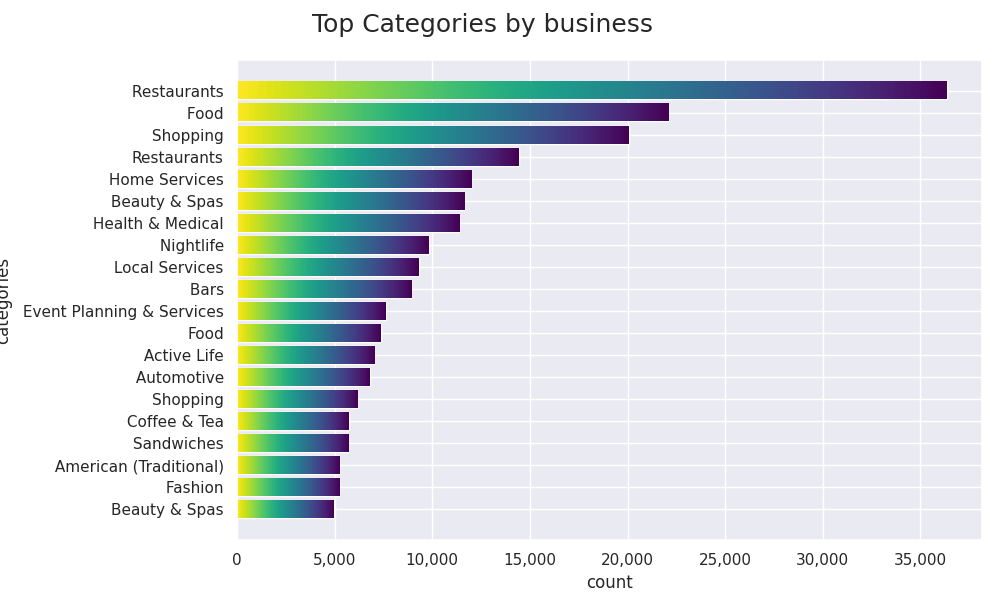

In [21]:
import matplotlib as mpl
index = pic1.index
values = pic1['count']
plot_title = 'Top Categories by business'
title_size = 18
x_label = "count"
y_label = "categories"

##Create subplots and set a colormap

pic1.sort_values(by='count', inplace=True, ascending=True)
fig, ax = plt.subplots(figsize=(10,6), facecolor=(.94, .94, .94))
mpl.pyplot.viridis()

##Create bars
bar = ax.barh(index, values)
plt.tight_layout()
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

##Set title, its font size, and position
title = plt.title(plot_title, pad=20, fontsize=title_size)
title.set_position([.33, 1])
plt.subplots_adjust(top=0.9, bottom=0.1)

##Create gradient background
ax.grid(zorder=0)
def gradientbars(bars):
    grad = np.atleast_2d(np.linspace(0,1,256))
    ax = bars[0].axes
    lim = ax.get_xlim()+ax.get_ylim()
    for bar in bars:
        bar.set_zorder(1)
        bar.set_facecolor('none')
        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        ax.imshow(grad, extent=[x+w, x, y, y+h], aspect='auto', zorder=1)
    ax.axis(lim)
gradientbars(bar)

##Set a subtitle and labels
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
%matplot plt

# Do Yelp Reviews Skew Negative?

Oftentimes, it is said that the only people who write a written review are those who are extremely _dissatisfied_ or extremely _satisfied_ with the service received. 

How true is this really? Let's try and answer this question.

## Loading User Data

Begin by loading the user data set from S3 and printing schema to determine what data is available.

In [22]:
review =spark.read.json('s3://sta9760f2021spark-weiye/yelp/yelp_academic_dataset_review.json')
review.show(5)
review.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|buF9druCkbuXLX526...|   1|2014-10-11 03:34:02|    1|lWC-xP3rd6obsecCY...|  4.0|Apparently Prides...|     3|ak0TdVmGKo4pwqdJS...|
|RA4V8pr014UyUbDvI...|   0|2015-07-03 20:38:25|    0|8bFej1QE5LXp4O05q...|  4.0|This store is pre...|     1|YoVfDbnISlW0f7abN...|
|_sS2LBIGNT5NQb6PD...|   0|2013-05-28 20:38:06|    0|NDhkzczKjLshODbqD...|  5.0|I called WVM on t...|     0|eC5evKn1TWDyHCyQA...|
|0AzLzHfOJgL7ROwhd...|   1|2010-01-08 02:29:15|    1|T5fAqjjFooT4V0OeZ...|  2.0|I've stayed at ma...|     1|SFQ1jcnGguO0LYWnb...|
|8zehGz9jnxPqXtOc7...|   0|2011-07-28 18:05:01|    0|sjm_uUcQVxab_EeLC...|  4.0|The food i

Let's begin by listing the `business_id` and `stars` columns together for the user reviews data.

In [23]:
review1 = review.select("business_id", "stars")
review2 = review1.filter("text is not null")
review2.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|buF9druCkbuXLX526...|  4.0|
|RA4V8pr014UyUbDvI...|  4.0|
|_sS2LBIGNT5NQb6PD...|  5.0|
|0AzLzHfOJgL7ROwhd...|  2.0|
|8zehGz9jnxPqXtOc7...|  4.0|
+--------------------+-----+
only showing top 5 rows

Now, let's aggregate along the `stars` column to get a resultant dataframe that displays _average stars_ per business as accumulated by users who **took the time to submit a written review**.

In [24]:
from pyspark.sql.functions import mean, count, sum, col
review3 = review2.groupBy("business_id").agg(mean('stars').alias("avg_stars"))
review3.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----------------+
|         business_id|        avg_stars|
+--------------------+-----------------+
|uEUweopM30lHcVxjO...|              3.0|
|wdBrDCbZopowEkIEX...|4.538461538461538|
|L3WCfeVozu5etMhz4...|              4.2|
|bOnsvrz1VkbrZM1jV...|              3.8|
|R0IJhEI-zSJpYT1YN...|3.606060606060606|
+--------------------+-----------------+
only showing top 5 rows

In [25]:
review4 = review2.toPandas()
review5 = review3.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [26]:
review6 = review4.merge(review5, on='business_id')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [27]:
business3 =business1.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Now the fun part - let's join our two dataframes (reviews and business data) by `business_id`. 

In [52]:
merged = review6.merge(business3, on='business_id')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Let's see a few of these:

In [53]:
del merged['categories']
merged

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                    business_id  stars  ...     city state
0        buF9druCkbuXLX526sGELQ      4  ...  Beverly    MA
1        buF9druCkbuXLX526sGELQ      2  ...  Beverly    MA
2        buF9druCkbuXLX526sGELQ      5  ...  Beverly    MA
3        buF9druCkbuXLX526sGELQ      5  ...  Beverly    MA
4        buF9druCkbuXLX526sGELQ      1  ...  Beverly    MA
...                         ...    ...  ...      ...   ...
8635398  cmxezpbkAfUriQ3E0diyBA      1  ...  Orlando    FL
8635399  cmxezpbkAfUriQ3E0diyBA      1  ...  Orlando    FL
8635400  cmxezpbkAfUriQ3E0diyBA      1  ...  Orlando    FL
8635401  cmxezpbkAfUriQ3E0diyBA      1  ...  Orlando    FL
8635402  cmxezpbkAfUriQ3E0diyBA      1  ...  Orlando    FL

[8635403 rows x 6 columns]

Compute a new dataframe that calculates what we will call the _skew_ (for lack of a better word) between the avg stars accumulated from written reviews and the _actual_ star rating of a business (ie: the average of stars given by reviewers who wrote an actual review **and** reviewers who just provided a star rating).

The formula you can use is something like:

```
(row['avg(stars)'] - row['stars']) / row['stars']
```

If the **skew** is negative, we can interpret that to be: reviewers who left a written response were more dissatisfied than normal. If **skew** is positive, we can interpret that to be: reviewers who left a written response were more satisfied than normal.

In [54]:
merged['skew'] = ((merged.avg_stars - merged.stars) / merged.stars)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [55]:
merged['count'] = merged.groupby('business_id')['business_id'].transform('count')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [56]:
del merged['business_id']
del merged['avg_stars']
del merged['stars']
del merged['city']
del merged['state']
del merged['name']
merged

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

         skew  count
0          -0     84
1           1     84
2          -0     84
3          -0     84
4           3     84
...       ...    ...
8635398     0      6
8635399     0      6
8635400     0      6
8635401     0      6
8635402     0      6

[8635403 rows x 2 columns]

And finally, graph it!

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

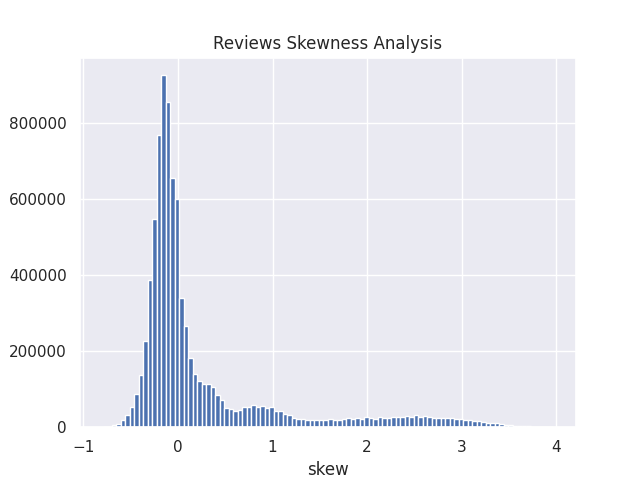

In [59]:
merged.hist('skew', bins=100)
plt.title("Reviews Skewness Analysis")
plt.xlabel("skew")
plt.ylabel("reviews")
%matplot plt

So, do Yelp (written) Reviews skew negative? Does this analysis actually prove anything? Expound on implications / interpretations of this graph. 

# Should the Elite be Trusted? (Or, some other analysis of your choice)

For the final portion - you have a choice:

* Try and analyze some interesting dimension to this data. The **ONLY** requirement is that you must use the **Users** dataset and join on either the **business* or **reviews** dataset
* Or, you may try and answer the question posed: how accurate or close are the ratings of an "elite" user (check Users table schema) vs the actual business rating.

Feel free to use any and all methodologies at your disposal - only requirement is you must render one visualization in your analysis

In [60]:
user =spark.read.json('s3://sta9760f2021spark-weiye/yelp/yelp_academic_dataset_user.json')
user.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)

In [61]:
review.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

In [62]:
elite = user.select("user_id", "average_stars","elite", "review_count")
elite.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------+--------------------+------------+
|             user_id|average_stars|               elite|review_count|
+--------------------+-------------+--------------------+------------+
|q_QQ5kBBwlCcbL1s4...|         3.85|2006,2007,2008,20...|        1220|
|dIIKEfOgo0KqUfGQv...|         4.09|2007,2008,2009,20...|        2136|
|D6ErcUnFALnCQN4b1...|         3.76|           2010,2011|         119|
|JnPIjvC0cmooNDfsa...|         3.77|2009,2010,2011,20...|         987|
|37Hc8hr3cw0iHLoPz...|         3.72|      2009,2010,2011|         495|
+--------------------+-------------+--------------------+------------+
only showing top 5 rows

In [63]:
elite1 = elite.filter("elite is not null")
elite2 = elite1.filter(elite1.review_count > 0)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [64]:
elite3 = elite2.drop("elite")
elite4 = elite3.withColumnRenamed("user_id","elite_id")
elite4.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------+------------+
|            elite_id|average_stars|review_count|
+--------------------+-------------+------------+
|q_QQ5kBBwlCcbL1s4...|         3.85|        1220|
|dIIKEfOgo0KqUfGQv...|         4.09|        2136|
|D6ErcUnFALnCQN4b1...|         3.76|         119|
|JnPIjvC0cmooNDfsa...|         3.77|         987|
|37Hc8hr3cw0iHLoPz...|         3.72|         495|
+--------------------+-------------+------------+
only showing top 5 rows

In [67]:
non_eli = elite.filter(elite.elite == "")
non_eli1 = non_eli.filter(non_eli.review_count > 0)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [68]:
non_eli2 = non_eli1.drop("elite")
non_eli3 = non_eli2.withColumnRenamed("user_id","non_eli_id")
non_eli3.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------+------------+
|          non_eli_id|average_stars|review_count|
+--------------------+-------------+------------+
|eCJoZqpV1fDKJGAsX...|         3.86|          51|
|cxS6dbjyPgPS1S890...|         4.18|          65|
|m-zIVssiXN4bnDFqM...|          4.5|           2|
|9RIXlhUb_xEVuc_o0...|         3.57|          53|
|s40p6DP3uX822EfcR...|         3.59|          82|
+--------------------+-------------+------------+
only showing top 5 rows

In [69]:
elite5 = elite4.toPandas()
non_eli4 = non_eli3.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

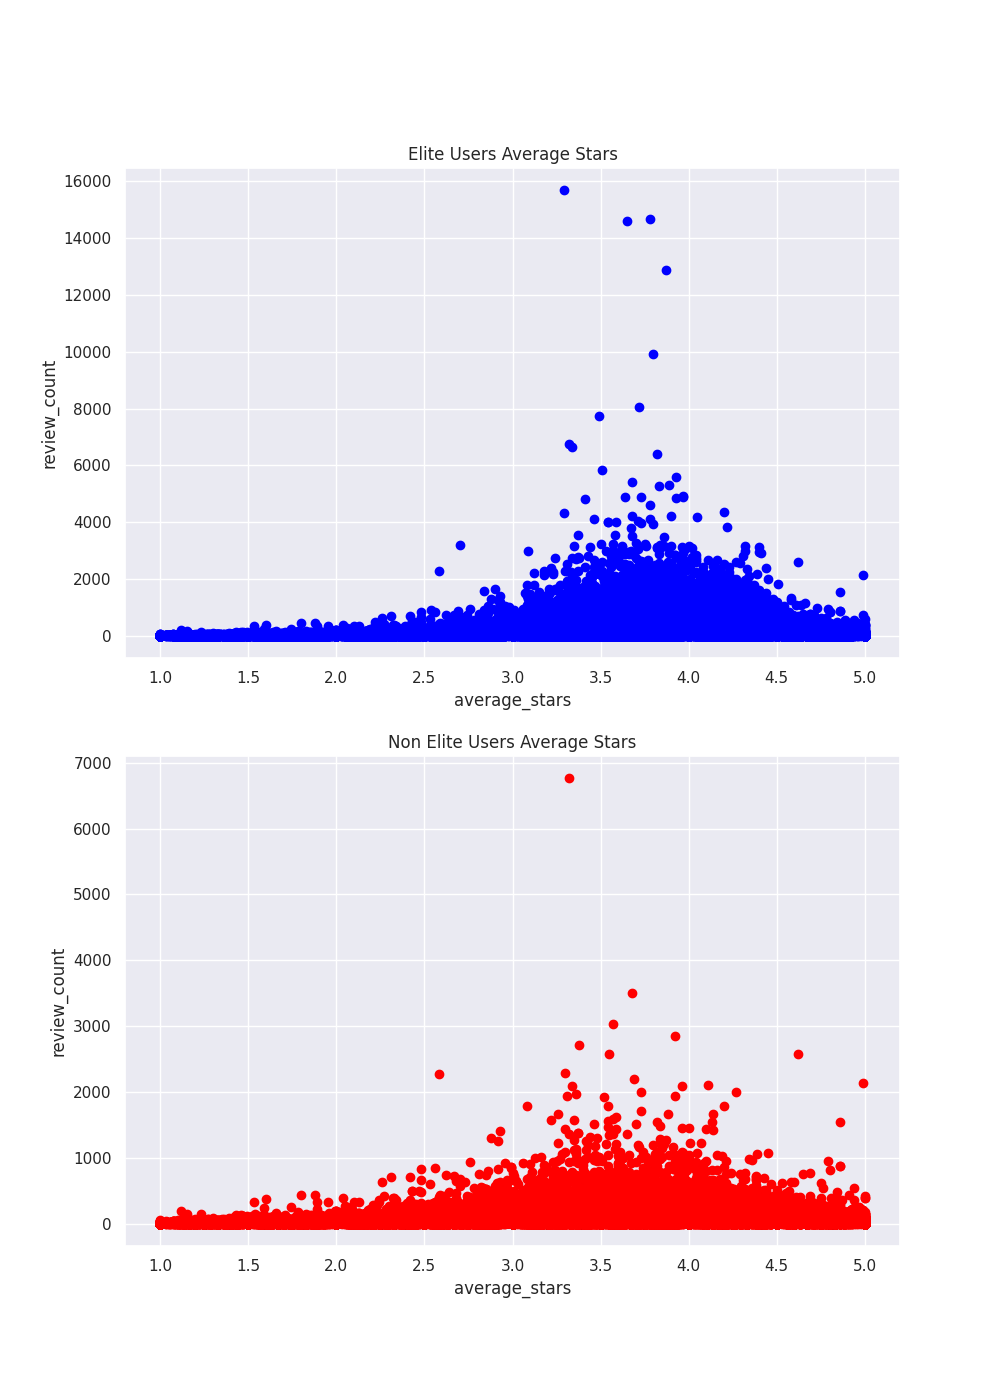

In [70]:
fig, ax = plt.subplots(2, figsize=(10, 14))
ax[0].scatter(x = elite5['average_stars'], y = elite5['review_count'], color ='blue')
ax[0].set_xlabel("average_stars")
ax[0].set_ylabel("review_count")
ax[0].set_title("Elite Users Average Stars")

ax[1].scatter(x = non_eli4['average_stars'], y = non_eli4['review_count'], color ='red')
ax[1].set_xlabel("average_stars")
ax[1].set_ylabel("review_count")
ax[1].set_title("Non Elite Users Average Stars")
%matplot plt

## Overall, Elite and Non-Elite users have similar trends and distributions
## But Elite users are more gathered distributed between 3.5 to 4 average stars
## Next, let's compare Elite users' rating with All users by boxplots

In [71]:
all_user = elite.drop("elite")
all_user1 = all_user.toPandas()
all_user1

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                        user_id  average_stars  review_count
0        q_QQ5kBBwlCcbL1s4NVK3g              4          1220
1        dIIKEfOgo0KqUfGQvGikPg              4          2136
2        D6ErcUnFALnCQN4b1W_TlA              4           119
3        JnPIjvC0cmooNDfsa9BmXg              4           987
4        37Hc8hr3cw0iHLoPzLK6Ow              4           495
...                         ...            ...           ...
2189452  OrXXOTSQG2hLEoZ4sw03Gg              1             1
2189453  pYZ4Dyx5I92u5gDfGiVTpQ              4             3
2189454  DhrXTJRTLhnvI9UI1q63mg              4            10
2189455  ka06dBaC9tvKhc7DJ9_7wQ              4             9
2189456  QfkFTrJ_MdM3Onk6przUJw              5             2

[2189457 rows x 3 columns]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

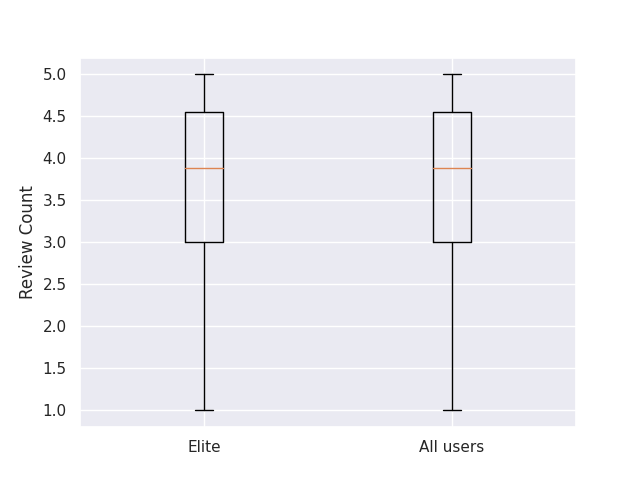

In [72]:
fig, ax = plt.subplots()
ax.boxplot([elite5["average_stars"], all_user1["average_stars"]])
ax.set_xticklabels(["Elite", "All users"])
ax.set_ylabel("Review Count")
%matplot plt

### The boxplots shows almost the same shape
### Next, let's move forward to join user dataset with review dataset

In [73]:
joined = user.join(review, ['user_id'])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [74]:
joined1 = joined.select("user_id", "average_stars", "stars","elite", "review_count")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [75]:
joined1.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------+-----+-----+------------+
|             user_id|average_stars|stars|elite|review_count|
+--------------------+-------------+-----+-----+------------+
|--1UpCuUDJQbqiuFX...|         2.62|  5.0|     |          12|
|--3Bk72HakneTyp3D...|         3.67|  5.0|     |          11|
|--3Hl2oAvTPlq-f7K...|         2.73|  2.0|     |          11|
|--3Hl2oAvTPlq-f7K...|         2.73|  5.0|     |          11|
|--3Hl2oAvTPlq-f7K...|         2.73|  2.0|     |          11|
+--------------------+-------------+-----+-----+------------+
only showing top 5 rows

In [76]:
all_join = joined1.drop("elite")
all_join1 = all_join.withColumnRenamed("stars","overall_stars")
all_join1.show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------+-------------+------------+
|             user_id|average_stars|overall_stars|review_count|
+--------------------+-------------+-------------+------------+
|--1UpCuUDJQbqiuFX...|         2.62|          5.0|          12|
|--3Bk72HakneTyp3D...|         3.67|          5.0|          11|
|--3Hl2oAvTPlq-f7K...|         2.73|          2.0|          11|
|--3Hl2oAvTPlq-f7K...|         2.73|          5.0|          11|
|--3Hl2oAvTPlq-f7K...|         2.73|          2.0|          11|
|--3Hl2oAvTPlq-f7K...|         2.73|          1.0|          11|
|--5FEgQNB3_7Wtjxk...|         3.67|          2.0|          11|
|--5FEgQNB3_7Wtjxk...|         3.67|          5.0|          11|
|--5FEgQNB3_7Wtjxk...|         3.67|          2.0|          11|
|--5FEgQNB3_7Wtjxk...|         3.67|          5.0|          11|
|--5FEgQNB3_7Wtjxk...|         3.67|          4.0|          11|
|--5FEgQNB3_7Wtjxk...|         3.67|          4.0|          11|
|--DCpT4hVZNRpRx57...|         2.25|    

In [77]:
eli_join = joined1.filter("elite is not null")
eli_join1 = eli_join.filter(all_join.review_count > 0)
eli_join2 = eli_join1.drop("elite")
eli_join3 = eli_join2.withColumnRenamed("stars","overall_stars")
eli_join3.show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------+-------------+------------+
|             user_id|average_stars|overall_stars|review_count|
+--------------------+-------------+-------------+------------+
|--1UpCuUDJQbqiuFX...|         2.62|          5.0|          12|
|--3Bk72HakneTyp3D...|         3.67|          5.0|          11|
|--3Hl2oAvTPlq-f7K...|         2.73|          2.0|          11|
|--3Hl2oAvTPlq-f7K...|         2.73|          5.0|          11|
|--3Hl2oAvTPlq-f7K...|         2.73|          2.0|          11|
|--3Hl2oAvTPlq-f7K...|         2.73|          1.0|          11|
|--5FEgQNB3_7Wtjxk...|         3.67|          2.0|          11|
|--5FEgQNB3_7Wtjxk...|         3.67|          5.0|          11|
|--5FEgQNB3_7Wtjxk...|         3.67|          2.0|          11|
|--5FEgQNB3_7Wtjxk...|         3.67|          4.0|          11|
|--5FEgQNB3_7Wtjxk...|         3.67|          5.0|          11|
|--5FEgQNB3_7Wtjxk...|         3.67|          4.0|          11|
|--DCpT4hVZNRpRx57...|         2.25|    

### Now we have two tables:
### One is the comparation between actual rating with user rating
### Another one is the comparation between Actual rating with Elite user rating